In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
import joblib
import os
import sys

In [18]:
sys.path.append(os.path.abspath(".."))

In [19]:
from scripts.data_preprocessing_script import preprocess_data
from scripts.model_training_and_evaluation import train_and_evaluate_model

In [20]:
# Dataset path
data_source = '/Users/sawlehaanwaar/Documents/GitHub/life_expectancy_prediction_ml_model/data/raw/life_expectancy_data.csv'

df_processed = preprocess_data(data_source)

df_processed.head()

Data loaded: (2938, 22)
Step 1: Clean column names - done
Step 2: Convert column names to lowercase - done
Step 3: Encode categorical variables - done
Step 4: Impute missing values - done
Step 5: Transform skewed data - done
Step 6: Cap outliers - done
Step 7: Winsorize 'Percentage expenditure' - done
Preprocessing complete.


,country,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,...,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling,status_Developing
0,1.0,2015.0,65.0,263.0,7.874008,0.1,4.280542,3.555348,7.051856,19.1,...,8.16,65.0,0.09531,6.372055,17.334091,17.2,17.3,0.479,10.1,1.0
1,1.0,2014.0,59.9,271.0,8.000000,0.1,4.311116,3.637586,6.200509,18.6,...,8.18,62.0,0.09531,6.419501,12.699497,17.5,17.5,0.476,10.0,1.0
2,1.0,2013.0,59.9,268.0,8.124038,0.1,4.307023,3.583519,6.066108,18.1,...,8.13,64.0,0.09531,6.450067,17.272826,17.7,17.7,0.470,9.9,1.0
3,1.0,2012.0,59.5,272.0,8.306624,0.1,4.371777,3.496508,7.933080,17.6,...,8.52,67.0,0.09531,6.508708,15.123021,17.9,18.0,0.463,9.8,1.0
4,1.0,2011.0,59.2,275.0,8.426150,0.1,2.091507,3.465736,8.011023,17.2,...,7.87,68.0,0.09531,4.167242,14.906964,18.2,18.2,0.454,9.5,1.0


In [21]:
alpha = 0.0001
lasso_model, scaler, X_train_scaled, X_test_scaled, y_train, y_test, y_pred = train_and_evaluate_model(df_processed, alpha=alpha)

Mean Absolute Error: 2.5670103329651104
Mean Squared Error: 11.388725444153526
Root Mean Squared Error: 3.374718572585502
R-squared: 0.867310883932884


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.711e+03, tolerance: 2.108e+01
  model = cd_fast.enet_coordinate_descent(


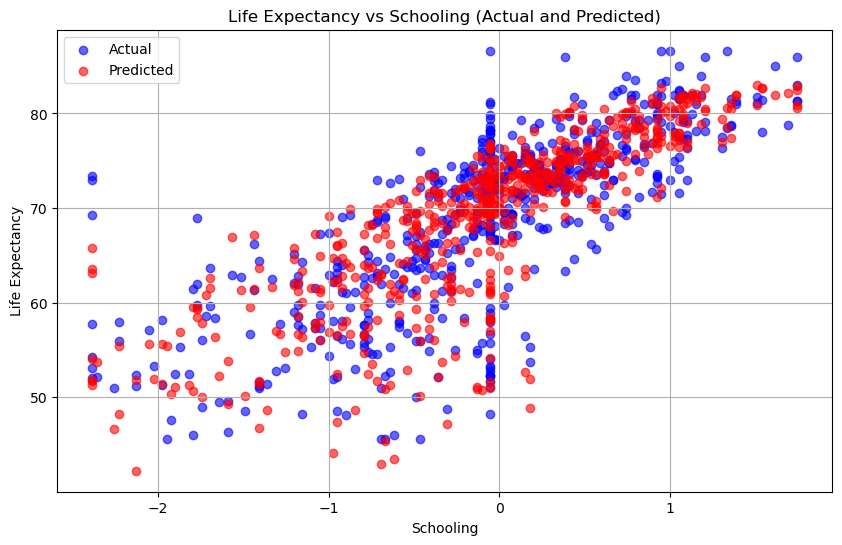

In [24]:
# Assuming that 'schooling' is the feature you want to plot against
schooling_index = df_processed.columns.get_loc('schooling') - 1  # Adjust for the dropped target column

# Plotting Life Expectancy vs Schooling (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, schooling_index], y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(X_test_scaled[:, schooling_index], y_pred, label='Predicted', color='red', alpha=0.6)
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Schooling (Actual and Predicted)')
plt.legend()
plt.grid(True)
plt.show()


This plot shows that the model performs reasonably well in capturing the relationship between schooling and life expectancy, though there is room for improvement in certain regions. The model might not be capturing all the factors influencing life expectancy in regions with low schooling (perhaps other features like healthcare access, income, or government expenditure play a more critical role here).

However the model captures overall trend between schooling and life expectancy with some degree of error.

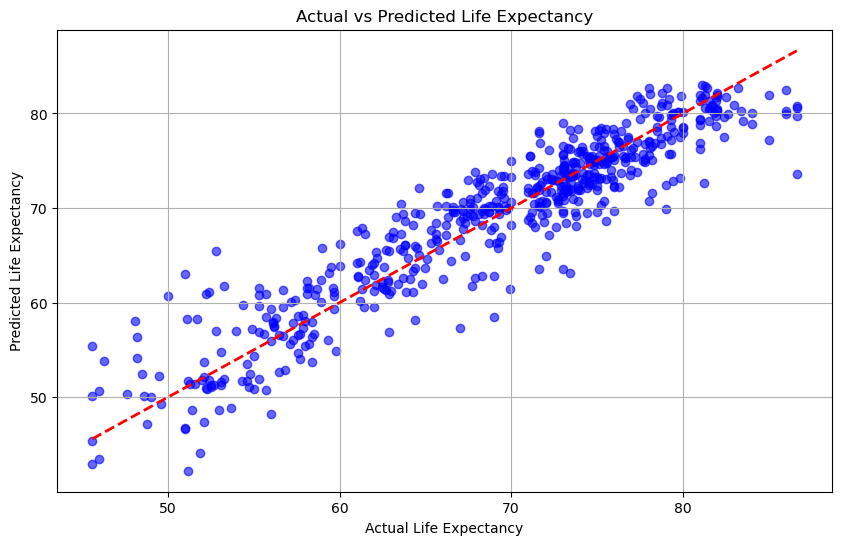

In [11]:
# Plotting Actual vs Predicted Life Expectancy
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.grid(True)
plt.show()

A lot of blue dots are clustered around the red line, which means that the model's predictions are fairly accurate for a significant portion of the data points. The overall positive trend between actual and predicted values confirms that the model is capturing the relationship between features and life expectancy well.

The points that fall far from the red line indicate prediction errors. These data points represent instances where the model's predictions significantly deviate from the actual values. Some of the life expectancy values in the lower range (50-55 years) are overpredicted, while some values in the higher range (75-80 years) are underpredicted.

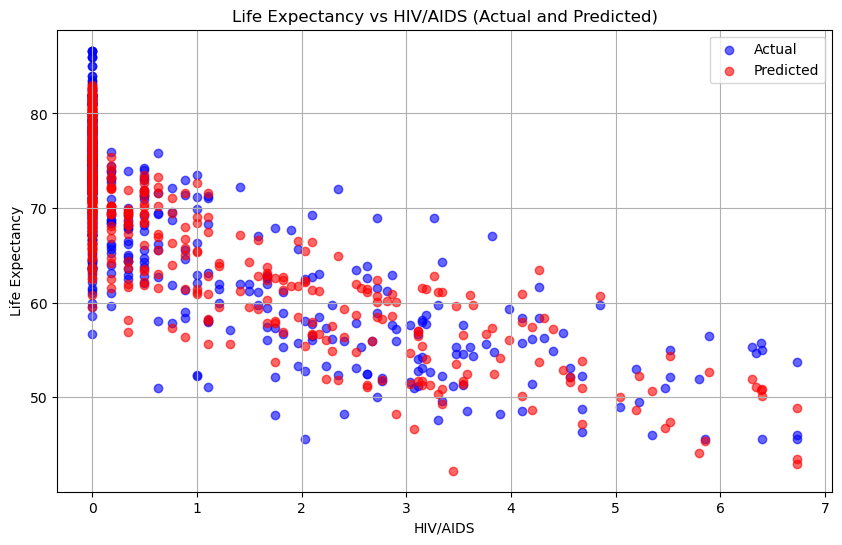

In [25]:

# Assuming that 'hiv/aids' is the feature you want to plot against
hiv_aids_index = df_processed.columns.get_loc('hiv/aids') - 1  # Adjust for the dropped target column

# Plotting Life Expectancy vs HIV/AIDS (Actual and Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, hiv_aids_index], y_test, label='Actual', color='blue', alpha=0.6)
plt.scatter(X_test_scaled[:, hiv_aids_index], y_pred, label='Predicted', color='red', alpha=0.6)
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs HIV/AIDS (Actual and Predicted)')
plt.legend()
plt.grid(True)
plt.show()


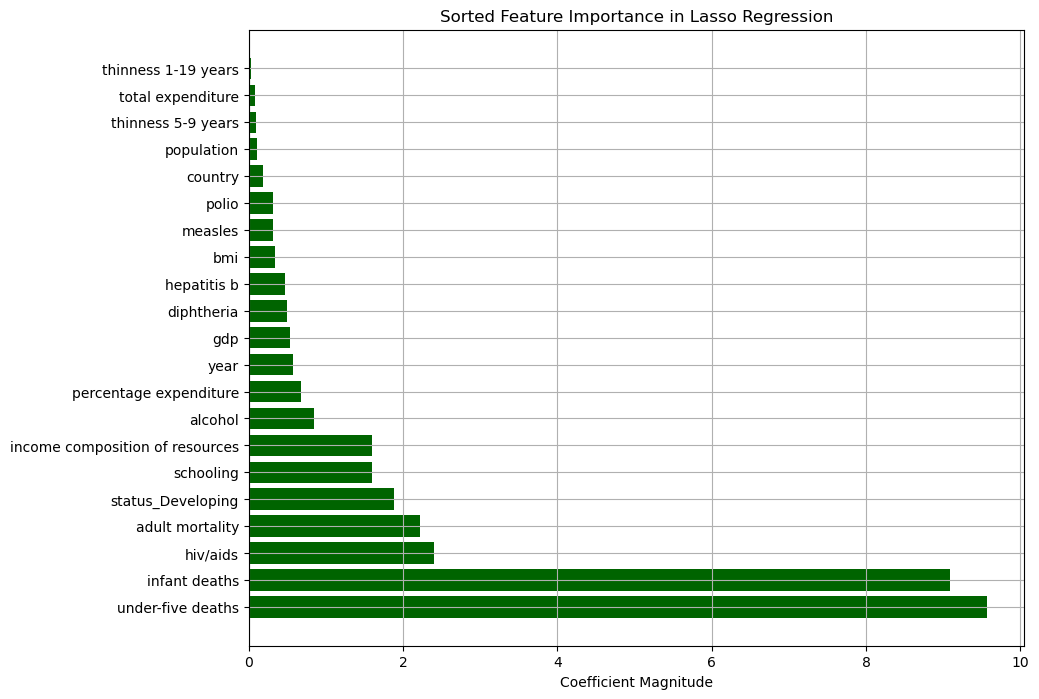

In [27]:
# Feature importance based on Lasso coefficients
lasso_coefficients = np.abs(lasso_model.coef_)
feature_names = df_processed.drop('life expectancy', axis=1).columns  # Get feature names

# Sort the coefficients and feature names by the magnitude of the coefficients
sorted_indices = np.argsort(lasso_coefficients)[::-1]  # Sorting in descending order
sorted_coefficients = lasso_coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting sorted feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_coefficients, color='darkgreen')
plt.xlabel('Coefficient Magnitude')
plt.title('Sorted Feature Importance in Lasso Regression')
plt.grid(True)
plt.show()



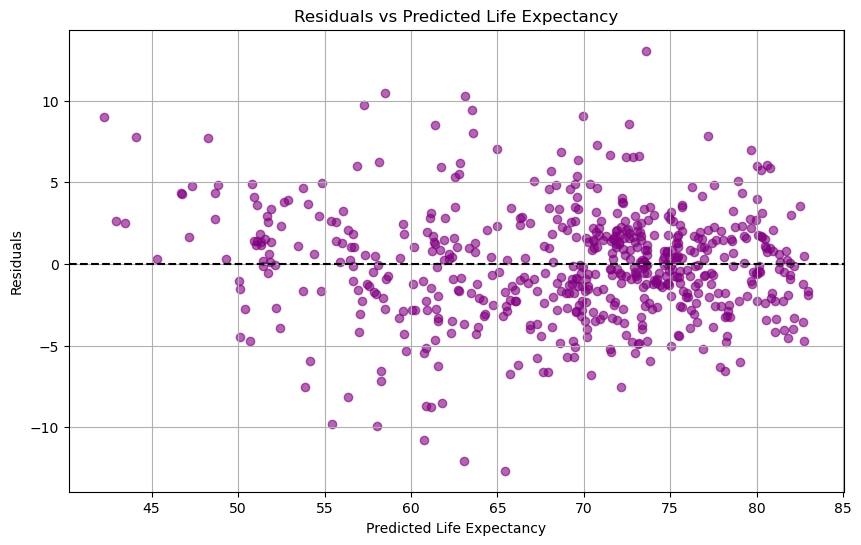

In [28]:
# Calculating residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Life Expectancy')
plt.grid(True)
plt.show()


Residuals vs. Predicted Life Expectancy:

The plot shows difference between the actual and predicted values, plotted against the predicted life expectancy.
In a well-fitting regression model, the residuals should be randomly scattered around the horizontal line at 0.
The scatter of residuals seems fairly random with some concentration around 0, which indicates that the model fits the data reasonably well. However, there are some larger residuals both above and below zero, especially at the lower and upper bounds of predicted life expectancy, which might suggest some model bias at these extremes.

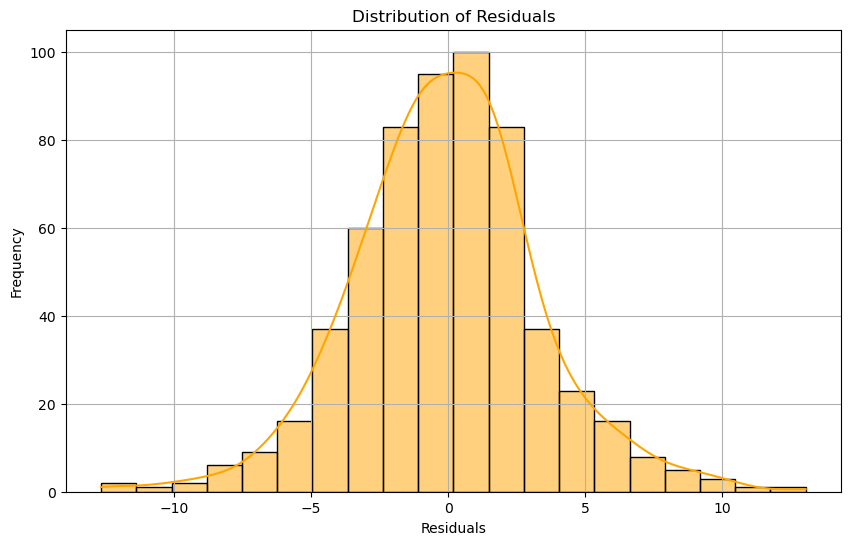

In [29]:
# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Distribution of Residuals:
The residuals appear to be normally distributed, as shown by the bell-shaped curve. This is a good sign, as one of the assumptions of linear regression models like Lasso is that the residuals are normally distributed, which suggests the model’s predictions are generally unbiased, though there are a few outliers visible in the tails of the distribution.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.968e+01, tolerance: 3.475e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e+01, tolerance: 5.018e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.109e+02, toler

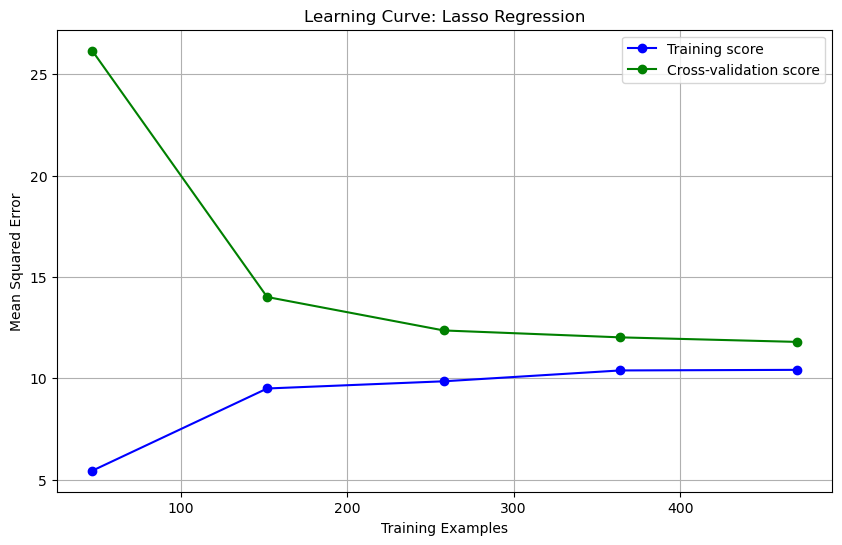

In [30]:
from sklearn.model_selection import learning_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    lasso_model, X_test_scaled, y_test, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Mean and standard deviation for training and testing scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

plt.title("Learning Curve: Lasso Regression")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Explanation of Learning Curve:
The training score (blue line) represents the model's performance on the training data. 
A lower value of the Mean Squared Error (MSE) indicates better performance.
Initially, when the number of training examples is small, the training score is quite good (low MSE), indicating the model fits the training data well.
As the number of training examples increases, the training score becomes worse (MSE increases slightly). This is expected as the model has more data to generalize on.

The cross-validation score (green line) represents the model’s performance on unseen data.
Initially, the cross-validation error is very high, indicating that the model is not generalizing well. As more training data is added, the cross-validation score improves, and the error decreases. This means the model becomes better at generalizing to new data.
After a certain point (around 200 examples), the improvement levels off. This suggests that additional training examples beyond this point are not significantly improving generalization.

The gap between the training and cross-validation scores provides insight into the model's bias-variance tradeoff.
In this graph, the gap between the lines is moderate, suggesting that the model is generalizing relatively well. However, there is still some room for improvement in the model’s ability to generalize. The model does not overfit significantl, but the gap between training and cross-validation scores could potentially be reduced.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.989e+02, tolerance: 4.001e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+03, tolerance: 4.022e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+03, toler

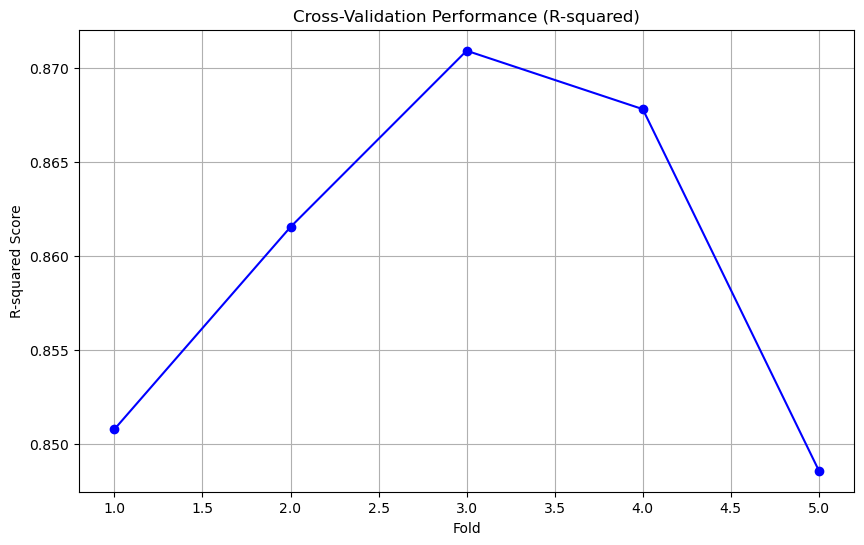

Cross-validation R-squared scores: [0.85077567 0.86154115 0.8709219  0.86781256 0.8485715 ]
Mean R-squared score: 0.8599245575707206


In [31]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for R-squared
cv_scores = cross_val_score(lasso_model, X_test_scaled, y_test, cv=5, scoring='r2')

# Plot cross-validation R-squared scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Fold')
plt.ylabel('R-squared Score')
plt.title('Cross-Validation Performance (R-squared)')
plt.grid(True)
plt.show()

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {np.mean(cv_scores)}")


Explanation of cross-validation performance:
The R-squared score tells us how well the model is explaining the variability in life expectancy. Higher R-squared means the model is doing a better job predicting life expectancy.

On average, the model is explaining about 85.99% of the variation in life expectancy.

The model is stable and consistent since r-squared scores are pretty close to each other
The average R squared of 0.8599 is strong which suggests that the model is able to explain a large portion of why life expectancy varies across different cases.